# COGS 108 - Final Project (change this to your project's title)

# Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [  ] YES - make available
* [  ] NO - keep private

# Names

- Dhanashree Kulkarni
- Neela Kolte
- Krystal Chai
- Kira Nguyen
- Curtis Chen

# Abstract

Please write one to four paragraphs that describe a very brief overview of why you did this, how you did, and the major findings and conclusions.

# Research Question

-  Include a specific, clear data science question.
-  Make sure what you're measuring (variables) to answer the question is clear

What is your research question? Include the specific question you're setting out to answer. This question should be specific, answerable with data, and clear. A general question with specific subquestions is permitted. (1-2 sentences)



## Background and Prior Work


The Oscars is an awards ceremony meant to honor notable films in 24 respective categories, some of which include: Best Supporting Actress, Best Visual Effects, Best Director, and the like. Those who are nominated in each category are determined by the Academy, a group of individuals deemed to be dominated by white people (reported 19% nonwhite in 2022). Since Academy members also determine the winners, much controversy has erupted surrounding the lack of diversity and prejudiced nominations. 

The Oscars has historically been accused of being racist and sexist, and often not representing the opinion of viewer populations. Nominations of non-white artists are still much lesser, and there continues to be a lack of representation in the winners of the awards. From 1989 to 2015, 98.9% of winners for the Best Actress award were white artists, and similarly 93.2% of winners for the Best Actor award were white.<a name="cite_ref-1"></a>[<sup>1</sup>](#cite_note-1) From the beginning of the Academy Awards in 1929, only about 17% of the nominees have been women. The Oscars have claimed to take big steps to combat racism and bias in the proceedings of the awards but efforts to combat sexism are much less profound.

Nonetheless, the improvements, a panicked response to the public retaliating against this inequity in 2015 with the trending hashtag #OscarsSoWhite, doubled women and tripled their members of color on the Academy board.<a name="cite_ref-2"></a>[<sup>2</sup>](#cite_note-2) The overall nomination for underrepresented communities has also increased from about 9.5% to 17% since the hashtag made its rounds.<a name="cite_ref-3"></a>[<sup>3</sup>](#cite_note-3) However, The Inclusion List, a prior and continuing work focusing on data analysis in the entertainment industry to promote inclusivity, corroborates the need for even greater initiatives. Though their analysis, sorted into gender and ethnicity and broken down in every single award category, shows an overall uptick, their visualizations often highlight the remaining inequality (ex. Pie chart with text, “<2% of nominees for Best Director were women”).<a name="cite_ref-4"></a>[<sup>4</sup>](#cite_note-4) Our project covers a similar domain (more narrow in range), but aims to contextualize the analysis through recent trends in film and further demographic information if possible.

1. <a name="cite_note-1"></a> [^](#cite_ref-1) Chen, S. (13 May 2022) The Discriminatory Bias of Award Shows. *The Spectator*. https://stuyspec.com/article/the-discriminatory-bias-of-award-shows 
2. <a name="cite_note-2"></a> [^](#cite_ref-2) Latif, L. (14 April 2021) Has the Oscars really faced up to its race problem? *BBC*. https://www.bbc.com/culture/article/20210414-has-the-oscars-really-fixed-its-race-problem 
3. <a name="cite_note-3"></a> [^](#cite_ref-3) Smith, S. (2025) Oscars So White *The Inclusion List*. https://www.inclusionlist.org/oscars/oscars-so-white 
4. <a name="cite_note-4"></a> [^](#cite_ref-4) Smith, S. (2025) Best Director *The Inclusion List*. https://www.inclusionlist.org/oscars/director 


# Hypothesis



We hypothesize that an academy award nominee’s intersectionality of race and gender will negatively affect their likelihood of winning (win rate) if they are not white and/ or male. We control for the type of film by 1) mainly focusing on categories that do not take film type into account, and 2) aggregating all types of films for writing categories. We intend to test for statistical evidence of disparity between race and gender specifically that will overall hinder the nominees’ likelihood of winning.
Additionally, We also want to include birthplace as a proxy to industry connection as a variable to find a positive correlation between industry connection and nomination rate in order to further expand on prior work.



# Data

## Data overview

For each dataset include the following information
- Dataset #1
  - Denoted as oscars_data.csv in the repo.
  - Dataset Name: Academy awards dataset (oscars)
  - Link to the dataset: https://www.kaggle.com/datasets/dharmikdonga/academy-awards-dataset-oscars%20/data
  - Number of observations: 10396
  - Number of variables: 9
- Dataset #2 (if you have more than one!)
  - Denoted as birthplace_data.csv in the repo.
  - Dataset Name: Oscars - Best Actors and Actresses
  - Link to the dataset: http://jse.amstat.org/datasets/oscars.dat.txt
  - Number of observations: 155
  - Number of variables: 3

Dataset #1 was configured in reference to another kaggle dataset, https://www.kaggle.com/datasets/unanimad/the-oscar-award/data, but expands on it by adding columns on race and gender. It contains information on the gender, race, category, ceremony number and year for all Oscar winners and nominees from 1927-2019. It also includes the film name and year the film was made. The variables in the dataset are of object (string), Boolean, and integer type. The wrangling process for this dataset included: extracting only values that applied to our research, excluding columns we did not need (film title and film year), and standardizing unique values to certain categories as we see fit. After cleaning the .csv file, we did not find any null values.
Dataset #2 was curated by the Journal of Statistical Education. It has data on the winners of the Best Actor and Best Actress awards from 1929 to 2005, and details about their birthplace, year of birth, brith month, birth day, and the age at which they won the Oscar. For our purposes we extracted only the columns for the name of the actor/actress, their gender, the number of the ceremony in which they won, and their birthplace. Birthplace is defined as the U.S. state of birth for those born in the U.S. or the country of birth for those born elsewhere. All the variables in this dataset are of object (string) data type. The wrangling process for this dataset included filtering the relevant columns and dropping the rest. There is no missing data but it covers only a subset of the years covered in the first dataset.



In [131]:
data1 = pd.read_csv('oscars_data.csv')
print(data1.head())
print('Shape of data1: ', data1.shape)

   year_film  year_ceremony  ceremony      Category  gender           name  \
0       1927           1928         1    Best Actor    Male  Emil Jannings   
1       1927           1928         1  Best Actress  Female   Janet Gaynor   
2       1928           1929         2    Best Actor    Male  Warner Baxter   
3       1928           1929         2  Best Actress  Female  Mary Pickford   
4       1929           1930         3    Best Actor    Male  George Arliss   

    Race              film  winner  
0  White  The Last Command    True  
1  White        7th Heaven    True  
2  White    In Old Arizona    True  
3  White          Coquette    True  
4  White          Disraeli    True  
Shape of data1:  (10396, 9)


In [132]:
# Extracting values that we want to focus on in our project.
data1 = data1[data1['Category'].isin(['Best Actor', 'Best Actress', 'DIRECTING (Comedy Picture)','DIRECTING (Dramatic Picture)', 'DIRECTING', 'WRITING (Adapted Screenplay)', 'WRITING (Original Story)','WRITING (Title Writing)', 'WRITING (Original Screenplay)', 'WRITING (Original Motion Picture Story)','WRITING (Motion Picture Story)', 'WRITING (Story and Screenplay)', 'WRITING (Screenplay--Original)', 'WRITING (Story and Screenplay--written directly for the screen)', 'WRITING (Story and Screenplay--based on material not previously published or produced)', 'WRITING (Story and Screenplay--based on factual material or material not previously published or produced)','WRITING (Screenplay Written Directly for the Screen--based on factual material or on story material not previously published or produced)','WRITING (Screenplay Written Directly for the Screen)'])]
# Dropping the columns that we are not using in our analysis.
data1.drop('film', axis=1, inplace=True)
data1.drop('year_film', axis=1, inplace=True)
# Naming the columns of data1.
data1.columns = ['Year_ceremony', 'Ceremony', 'Category', 'Gender', 'Name', 'Race','Winner']
print(data1.head())
print('Revised shape of data1: ', data1.shape)

   Year_ceremony  Ceremony      Category  Gender           Name   Race  Winner
0           1928         1    Best Actor    Male  Emil Jannings  White    True
1           1928         1  Best Actress  Female   Janet Gaynor  White    True
2           1929         2    Best Actor    Male  Warner Baxter  White    True
3           1929         2  Best Actress  Female  Mary Pickford  White    True
4           1930         3    Best Actor    Male  George Arliss  White    True
Revised shape of data1:  (2339, 7)


<ipython-input-132-2d9e5be3afb6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.drop('film', axis=1, inplace=True)
<ipython-input-132-2d9e5be3afb6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.drop('year_film', axis=1, inplace=True)


In [133]:
# Seeing if all values of our revised DataFrame are applicable to our subsequent function.
list(data1['Category'].unique())

['Best Actor',
 'Best Actress',
 'DIRECTING (Comedy Picture)',
 'DIRECTING (Dramatic Picture)',
 'WRITING (Adapted Screenplay)',
 'WRITING (Original Story)',
 'WRITING (Title Writing)',
 'DIRECTING',
 'WRITING (Original Screenplay)',
 'WRITING (Original Motion Picture Story)',
 'WRITING (Motion Picture Story)',
 'WRITING (Story and Screenplay)',
 'WRITING (Screenplay--Original)',
 'WRITING (Story and Screenplay--written directly for the screen)',
 'WRITING (Story and Screenplay--based on material not previously published or produced)',
 'WRITING (Story and Screenplay--based on factual material or material not previously published or produced)',
 'WRITING (Screenplay Written Directly for the Screen--based on factual material or on story material not previously published or produced)',
 'WRITING (Screenplay Written Directly for the Screen)']

In [134]:
# Creating a function that performs simple substring checking to group repeating unique values together.
def standardize_categories(category):
# Converting all text to lowercase and using strip() to remove leading and trailing characters.
  category = category.strip().lower()
  if 'actor' in category:
    category = 'Best Actor'
  elif 'actress' in category:
    category = 'Best Actress'
  elif 'directing' in category:
    category = 'Best Director'
  elif 'writing' in category:
    category = 'Best Screenplay'
  else:
    return None
  category = category.strip()
  return category

In [135]:
# Applying the transformation to our revised dataset.
data1['Category'] = data1['Category'].apply(standardize_categories)
# Verifying that the function works and is applied to our new dataset.
list(data1['Category'].unique())

['Best Actor', 'Best Actress', 'Best Director', 'Best Screenplay']

In [136]:
# Checking for missing data.
data1.isnull().sum()

,0
Year_ceremony,0
Ceremony,0
Category,0
Gender,0
Name,0
Race,0
Winner,0


In [137]:
print(data1['Race'].value_counts())
print(data1['Gender'].value_counts())

Race
White       2255
Black         56
Asian         23
Hispanic       5
Name: count, dtype: int64
Gender
Male      1735
Female     604
Name: count, dtype: int64


<ipython-input-138-259a9d361392>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = data1['Race'], palette={'White':'blue','Asian':'orange', 'Black':'green', 'Hispanic':'red'},


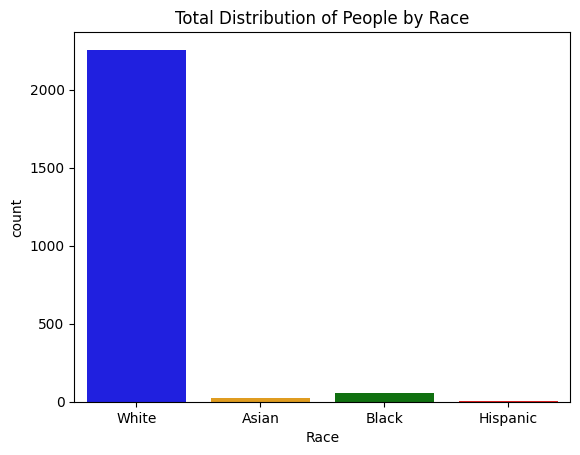

In [138]:
# Visualizing the distribution of race entries in our dataset.
sns.countplot(x = data1['Race'], palette={'White':'blue','Asian':'orange', 'Black':'green', 'Hispanic':'red'},
              order=['White', 'Asian', 'Black', 'Hispanic']);
plt.title('Total Distribution of People by Race')
plt.show()

<ipython-input-139-9508219e1b78>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = data1['Gender'], palette={'Male':'yellow','Female':'purple'});


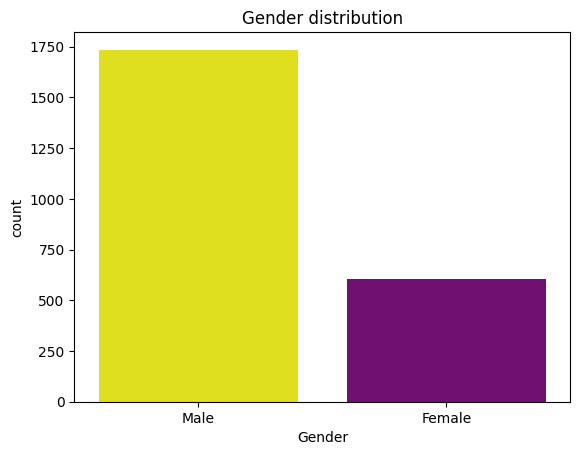

In [139]:
# Visualizing the distribution of male and female entries in our dataset.
sns.countplot(x = data1['Gender'], palette={'Male':'yellow','Female':'purple'});
plt.title('Gender distribution')
plt.show()

## Dataset #2 (birthplace_data.csv)

In [140]:
data2 = pd.read_csv('birthplace_data.csv')
# Naming the columns of data2.
data2.columns = ['Gender','Ceremony','Year_of_award','Name','Film','Age_when_won','State/Country','Birth_month','Birth_day','Birth_year']
# Dropping the columns that we are not using in our analysis.
data2.drop(['Year_of_award','Film','Age_when_won','Birth_month','Birth_day','Birth_year'], axis=1, inplace=True)
print(data2.head())
print('Shape of data2: ', data2.shape)

  Gender  Ceremony               Name  State/Country
0      f         2      Mary Pickford         Canada
1      f         3      Norma Shearer         Canada
2      f         4     Marie Dressler         Canada
3      f         5        Helen Hayes  Washington DC
4      f         6  Katharine Hepburn    Connecticut
Shape of data2:  (155, 4)


In [141]:
# Checking for missing data.
print(data2.isnull().sum())

Gender           0
Ceremony         0
Name             0
State/Country    0
dtype: int64


Gender
m    78
f    77
Name: count, dtype: int64


<ipython-input-142-03e48ff7aaa2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = data2['Gender'],  palette={'m':'yellow','f':'purple'})


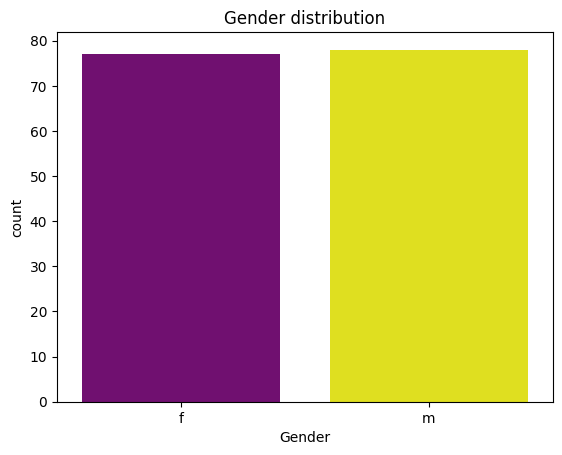

In [142]:
# Visualizing the distribution of male and female entries in our dataset.
print(data2['Gender'].value_counts())
sns.countplot(x = data2['Gender'],  palette={'m':'yellow','f':'purple'})
plt.title('Gender distribution')
plt.show()

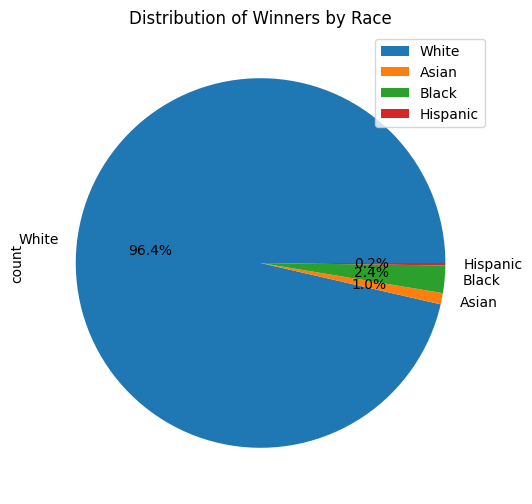

In [143]:
#Create pie chart of race
order = ['White', 'Asian', 'Black', 'Hispanic'];
race_counts = data1['Race'].value_counts();
race_counts = race_counts.reindex([race for race in order if race in race_counts.index])

pie_chart = race_counts.plot.pie(autopct='%1.1f%%',figsize=(6,6), color=['blue', 'orange', 'green', 'red'][:len(race_counts)]);
plt.legend(race_counts.index, loc='best');
plt.title('Distribution of Winners by Race');

This pie chart shows the distribution of winners by theirrace in the four categories that we are considering (Best Actor, Best Actress, Best Director, Best Screenplay) throughout the years 1927 to 2019.

In [ ]:
#Create geospatial heatmap of winner's birthplace vs winners
geolocator = Nominatim(user_agent="geoheatmap");

# Gets latitude + longitude
def get_lat_long(location):
    try:
        geo = geolocator.geocode(location, timeout=5);
        if geo:
            return geo.latitude, geo.longitude
        else:
            return None, None
    except GeocoderTimedOut:
        time.sleep(1)
        return get_lat_long(location);

# Apply geocoding to the "State/Country" column
data2[['Latitude', 'Longitude']] = data2['State/Country'].apply(lambda x: pd.Series(get_lat_long(x)));

# Create a folium map centered at the mean location
map_center = [data2['Latitude'].mean(), data2['Longitude'].mean()];
birth_map = folium.Map(location=map_center, zoom_start=3);

# Create heatmap layer
heat_data = list(zip(data2['Latitude'], data2['Longitude']));
HeatMap(heat_data).add_to(birth_map);

birth_map

We generated a geospatial heat map to show the distribution of Best Actor and Best Actress awardees by their birthplace from 1929 to 2005. We used the Folium library to generate this map. From this map we see that the north-eastern region of U.S.A has the highest concentration of winners followed by central areas of Great Britain. There is a high population density of winners in the U.S. compared to other countries.



We generated a geospatial heat map to show the distribution of Best Actor and Best Actress awardees by their birthplace from 1929 to 2005. We used the Folium library to generate this map. From this map we see that the north-eastern region of U.S.A has the highest concentration of winners followed by central areas of Great Britain. There is a high population density of winners in the U.S. compared to other countries.

In [ ]:
#Population density map for birthplace vs. winners


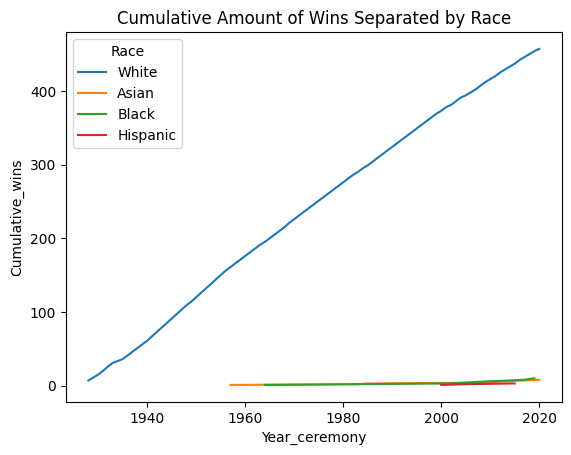

In [145]:
#line plot of cumulative count of winners separated by race, over time
winners = data1[data1['Winner'] == True];
race_counts = winners.groupby(['Year_ceremony', 'Race']).size().reset_index(name='Count');
race_counts['Cumulative_wins'] = race_counts.groupby('Race')['Count'].cumsum();
sns.lineplot(data=race_counts, x='Year_ceremony', y='Cumulative_wins', hue='Race');
plt.title("Cumulative Amount of Wins Separated by Race");

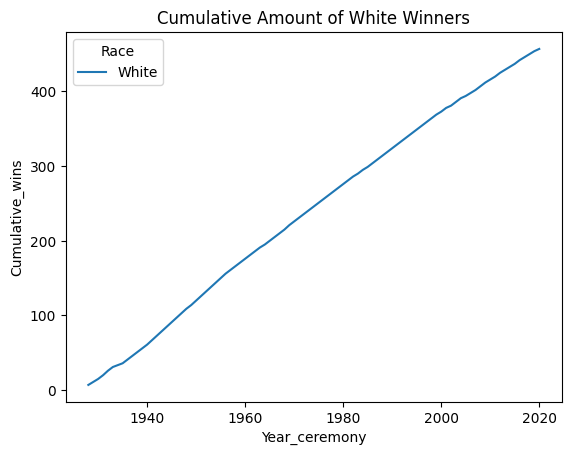

In [146]:
#Line plot with only white people
winners_white = data1[(data1['Winner'] == True) & (data1['Race'] == 'White')];
race_counts = winners_white.groupby(['Year_ceremony', 'Race']).size().reset_index(name='Count');
race_counts['Cumulative_wins'] = race_counts.groupby('Race')['Count'].cumsum();
sns.lineplot(data=race_counts, x='Year_ceremony', y='Cumulative_wins', hue='Race');
plt.title("Cumulative Amount of White Winners");

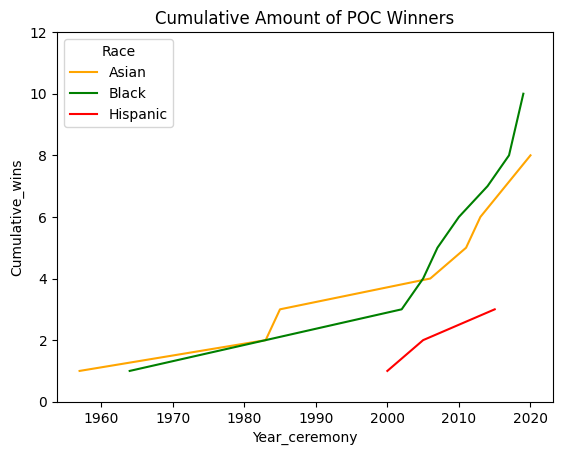

In [ ]:
#Line plot with other races
winners_poc = data1[(data1['Winner'] == True) & (data1['Race'] != 'White')];
race_counts = winners_poc.groupby(['Year_ceremony', 'Race']).size().reset_index(name='Count');
race_counts['Cumulative_wins'] = race_counts.groupby('Race')['Count'].cumsum();
sns.lineplot(data=race_counts, x='Year_ceremony', y='Cumulative_wins', hue='Race', palette={'Asian':'orange', 'Black':'green', 'Hispanic':'red'});
plt.title('Cumulative Amount of POC Winners');
plt.ylim(0, 12);

The 3 graphs shown above describe the cumulative Oscar wins in the four categories that we are considering (Best Actor, Best Actress, Best Director, Best Screenplay) grouped by race from 1927 to 2019. We see a strong positive correlation between total number of wins over the years with being White, whereas there is a less positive correleation seen in the case of people of color. The third graph also highlights the delay in integrating people of color in the Oscar Awards, especially in the case of Hispanic artists.
Overall, most of the Oscar awards in this time period are distributed among White artists. Evidently, there is a massive difference in the cumulative wins among White artists compared to those of other races. This is why we chose to also include a separate graph for artists of color since the first graph wasn't able to clearly show the trend of their cumaltive wins and the trend of their wins look stagnant.

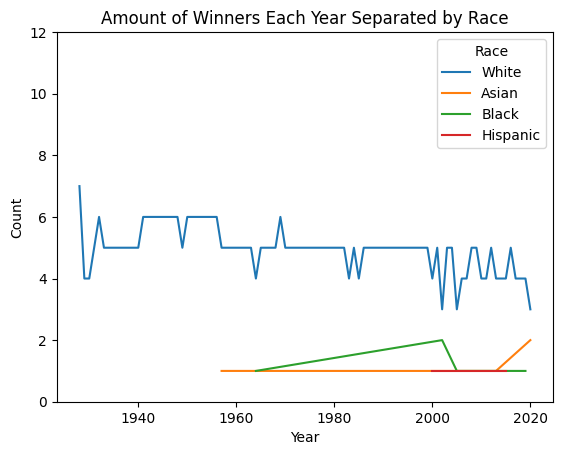

In [147]:
#Line plot of total winners for each year over time, separated by race
winners = data1[data1['Winner'] == True];
race_counts = winners.groupby(['Year_ceremony', 'Race']).size().reset_index(name='Count');
sns.lineplot(data=race_counts, x='Year_ceremony', y='Count', hue='Race');
plt.title("Amount of Winners Each Year Separated by Race");
plt.ylim(0, 12);
plt.xlabel('Year');

The following line plot shows the distribution of winners each year, from 1928-2020, as categorized by race. According to the graph shown, other races did not make their first appearance until before 1960. Even throughout the years, it is evident that the Oscar winners are predominantly white.

<ipython-input-169-2cd13c1a00f5>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=male_winners, x='Race', palette={'White':'blue','Asian':'orange', 'Black':'green', 'Hispanic':'red'},
<ipython-input-169-2cd13c1a00f5>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=male_winners, x='Race',


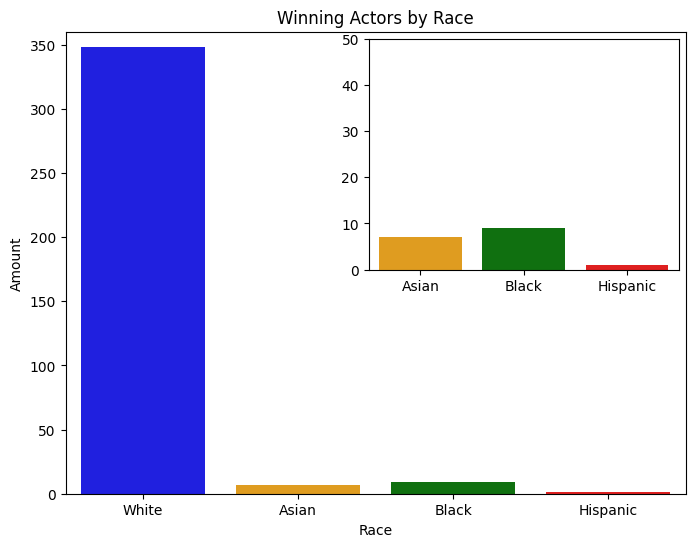

In [169]:
#Create bar chart of number of actors who won by race
male_winners = data1[(data1['Winner'] == True) & (data1['Gender'] == 'Male')];
fig, ax1 = plt.subplots(figsize=(8, 6));
sns.countplot(data=male_winners, x='Race', palette={'White':'blue','Asian':'orange', 'Black':'green', 'Hispanic':'red'},
              order=['White', 'Asian', 'Black', 'Hispanic'], ax=ax1);
ax1.set_title('Winning Actors by Race');
ax1.set_xlabel('Race');
ax1.set_ylabel('Amount');
ax1.set_ylim(0, 360);

#Inset graph
ax_inset = inset_axes(ax1, width="50%", height="50%", loc="upper right");
sns.countplot(data=male_winners, x='Race',
              palette={'White': 'blue', 'Asian': 'orange', 'Black': 'green', 'Hispanic': 'red'},
              order=['Asian', 'Black', 'Hispanic'], ax=ax_inset);

ax_inset.set_ylim(0, 50);
ax_inset.set_ylabel('');
ax_inset.set_xlabel('');
plt.show();

This bar chart illustrates the distribution of Best Actor winners by race. The y-axis represents the number of winners. According to the chart, the majority of winners are White, with a significant lead over other race. Black actors have the second highest number of wins, slightly more than Asian actors, while Hispanic actors have the fewest wins.

<ipython-input-158-f67ff759e53e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=male_noms, x='Race', palette={'White':'blue','Asian':'orange', 'Black':'green', 'Hispanic':'red'},
<ipython-input-158-f67ff759e53e>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=male_noms, x='Race',


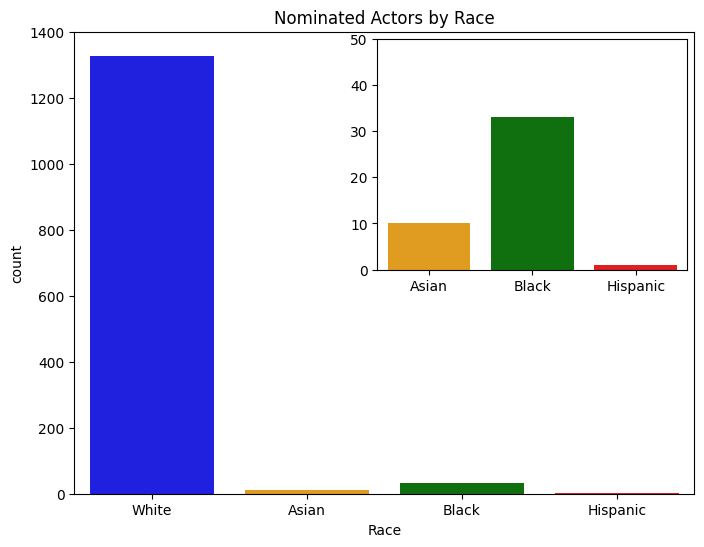

In [158]:
#Bar chart of men who got nominated by race
male_noms = data1[(data1['Winner'] == False) & (data1['Gender'] == 'Male')];
fig, ax1 = plt.subplots(figsize=(8, 6));
sns.countplot(data=male_noms, x='Race', palette={'White':'blue','Asian':'orange', 'Black':'green', 'Hispanic':'red'},
              order=['White', 'Asian', 'Black', 'Hispanic'], ax=ax1);
ax1.set_title('Nominated Actors by Race');
ax1.set_label('Race');
ax1.set_label('Amount');
ax1.set_ylim(0, 1400);
#Inset graph
ax_inset = inset_axes(ax1, width="50%", height="50%", loc="upper right");
sns.countplot(data=male_noms, x='Race',
              palette={'White': 'blue', 'Asian': 'orange', 'Black': 'green', 'Hispanic': 'red'},
              order=['Asian', 'Black', 'Hispanic'], ax=ax_inset);

ax_inset.set_ylim(0, 50);
ax_inset.set_ylabel('');
ax_inset.set_xlabel('');
plt.show();

This bar chart illustrates the distribution of the nominated actors by race. The y-axis represents the number of nominees. According to the chart, the majority of the nominated actors are White, with a significant lead over other race. Black nominees have the second highest counts, while Asian and Hispanic nominees are much fewer, with Hispanic nominees approaching zero.


<ipython-input-170-be54cd1ad540>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=female_winners, x='Race', palette={'White':'blue','Asian':'orange', 'Black':'green', 'Hispanic':'red'},
<ipython-input-170-be54cd1ad540>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=female_winners, x='Race',


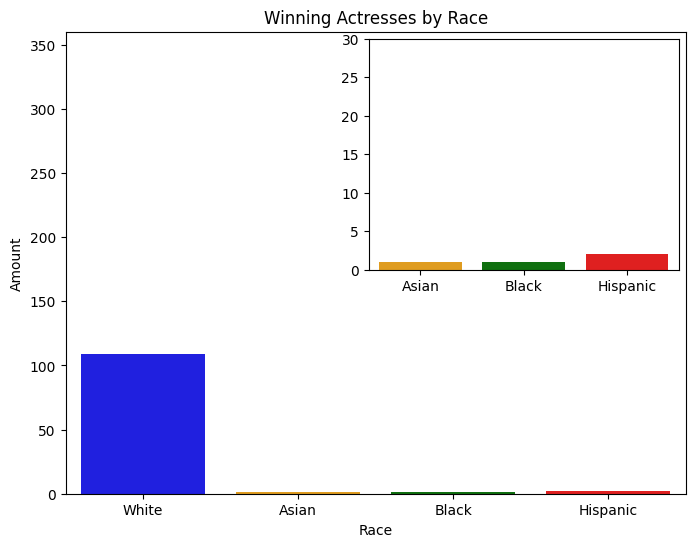

In [170]:
#Bar chart of number of white actresses who won vs. POC
female_winners = data1[(data1['Winner'] == True) & (data1['Gender'] == 'Female')];
fig, ax1 = plt.subplots(figsize=(8, 6));
sns.countplot(data=female_winners, x='Race', palette={'White':'blue','Asian':'orange', 'Black':'green', 'Hispanic':'red'},
              order=['White', 'Asian', 'Black', 'Hispanic'], ax=ax1);
ax1.set_title('Winning Actresses by Race');
ax1.set_xlabel('Race');
ax1.set_ylabel('Amount');
ax1.set_ylim(0, 360)

#Inset graph
ax_inset = inset_axes(ax1, width="50%", height="50%", loc="upper right");
sns.countplot(data=female_winners, x='Race',
              palette={'White': 'blue', 'Asian': 'orange', 'Black': 'green', 'Hispanic': 'red'},
              order=['Asian', 'Black', 'Hispanic'], ax=ax_inset);

ax_inset.set_ylim(0, 30);
ax_inset.set_ylabel('');
ax_inset.set_xlabel('');
plt.show();

This bar chart illustrates the distribution of Best Actress winners by race. The y-axis represents the number of winners. According to the chart, the majority of winners are White, with a significant lead over other race. Hispanic actresses have the second highest number of wins. Black actresses and Asian actresses have the around the same numbers of wining with Black actresses winning slightly more.

<ipython-input-162-2dedcc51cda8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=female_noms, x='Race', palette={'White':'blue','Asian':'orange', 'Black':'green', 'Hispanic':'red'},
<ipython-input-162-2dedcc51cda8>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=female_noms, x='Race',


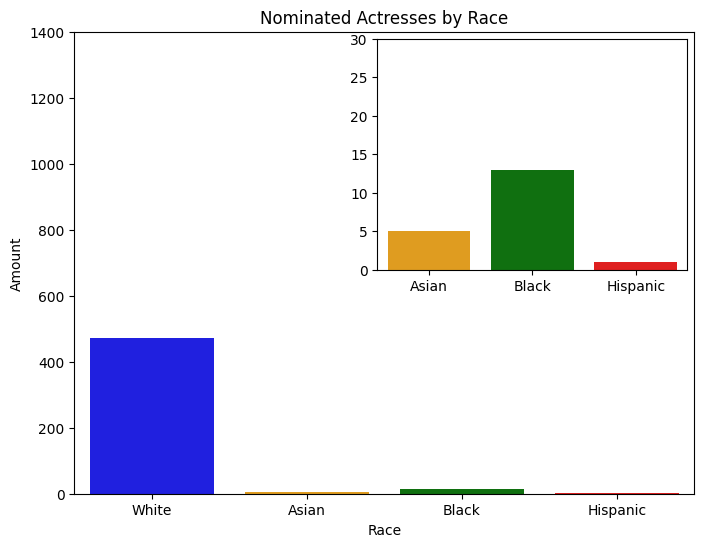

In [162]:
#Bar chart of number of actresses who got nominated by race
female_noms = data1[(data1['Winner'] == False) & (data1['Gender'] == 'Female')];
fig, ax1 = plt.subplots(figsize=(8, 6));
sns.countplot(data=female_noms, x='Race', palette={'White':'blue','Asian':'orange', 'Black':'green', 'Hispanic':'red'},
              order=['White', 'Asian', 'Black', 'Hispanic'], ax=ax1);
ax1.set_title('Nominated Actresses by Race');
ax1.set_xlabel('Race');
ax1.set_ylabel('Amount');
ax1.set_ylim(0, 1400);

#Inset graph
ax_inset = inset_axes(ax1, width="50%", height="50%", loc="upper right");
sns.countplot(data=female_noms, x='Race',
              palette={'White': 'blue', 'Asian': 'orange', 'Black': 'green', 'Hispanic': 'red'},
              order=['Asian', 'Black', 'Hispanic'], ax=ax_inset);

ax_inset.set_ylim(0, 30);
ax_inset.set_ylabel('');
ax_inset.set_xlabel('');
plt.show();

This bar chart illustrates the distribution of the nominated actresses by race. The y-axis represents the number of nominees. According to the chart, the majority of the nominated actresses are White, with a significant lead over other race. Black nominees have the second highest counts, while Asian and Hispanic nominees are much fewer. Compare to the bar chart of nominated actors. There seems to have more Asian actress nominees but the amount of Hispanic nominees are close to zero either.

<ipython-input-163-ebbca6a103f0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=all_wins, x='Race', palette={'White':'blue','Asian':'orange', 'Black':'green', 'Hispanic':'red'}, order=['White', 'Asian', 'Black', 'Hispanic']);


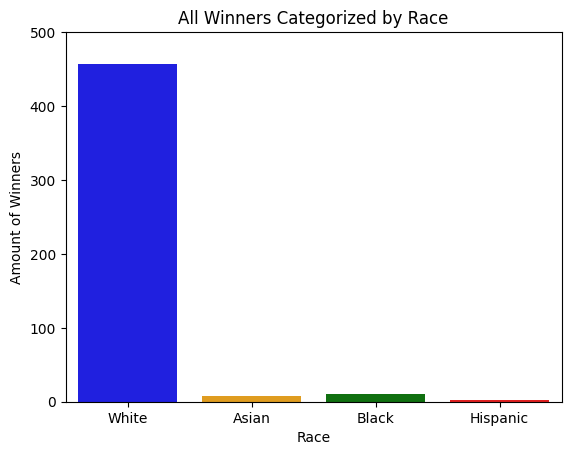

In [163]:
#bar graph analyzing all winners by race
all_wins = data1[(data1['Winner'] == True)];
sns.countplot(data=all_wins, x='Race', palette={'White':'blue','Asian':'orange', 'Black':'green', 'Hispanic':'red'}, order=['White', 'Asian', 'Black', 'Hispanic']);
plt.title('All Winners Categorized by Race');
plt.xlabel('Race');
plt.ylabel('Amount of Winners');
plt.ylim(0, 500);

## Inferential Statistics 



In [ ]:
# Replacing True and False values with 1s and 0s.
data1 = data1.replace({True: 1, False: 0})

In [ ]:
# Running a logistic regression statistics model.
mod = smf.logit('Winner ~ C(Gender, Treatment(reference="Male")) + C(Race, Treatment(reference="White")) + C(Category) + Year_ceremony', data1).fit()
print(mod.summary())

## Predictive Model



In [ ]:
# THIS IS THE PREPROCESSING FOR THE MODEL.
# Defining the predictors and target variables.
X = data1[['Category', 'Race', 'Gender', 'Year_ceremony']]
y= data1['Winner']

In [ ]:
# Encoding the categorical independent variables using the OneHotEncoder.
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_encoded = encoder.fit_transform(X[['Race', 'Gender', 'Category']])

In [ ]:
# Creating a new dataframe from the encoded values.
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(['Race', 'Gender', 'Category']))
X_encoded_df.reset_index(drop=True)
# Adding the Year_ceremony values to the independent variables.
new_column = list(X['Year_ceremony'])
X_encoded_df['Year_ceremony'] = new_column

In [ ]:
# Splitting data into training and test data and shuffling.
X_train, X_test, y_train, y_test = train_test_split(X_encoded_df, y, test_size=0.5, random_state=42, shuffle=True)

In [ ]:
# Scaling the Year_ceremony column using StandardScaler.
sc = StandardScaler()
X_train['Year_ceremony'] = sc.fit_transform(np.array(X_train['Year_ceremony']).reshape(-1, 1))
X_test['Year_ceremony'] = sc.fit_transform(np.array(X_test['Year_ceremony']).reshape(-1, 1))

In [ ]:
# Training Random Forest Classifier based on n_estimators that we determined through cross-validation scores.
rf = RandomForestClassifier(n_estimators=9, random_state=0)
rf.fit(X_train, y_train)
# Making predictions, and printing the classification report and confusion matrix.
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Ethics & Privacy

- Thoughtful discussion of ethical concerns included
- Ethical concerns consider the whole data science process (question asked, data collected, data being used, the bias in data, analysis, post-analysis, etc.)
- How your group handled bias/ethical concerns clearly described

Acknowledge and address any ethics & privacy related issues of your question(s), proposed dataset(s), and/or analyses. Use the information provided in lecture to guide your group discussion and thinking. If you need further guidance, check out [Deon's Ethics Checklist](http://deon.drivendata.org/#data-science-ethics-checklist). In particular:

- Are there any biases/privacy/terms of use issues with the data you propsed?
- Are there potential biases in your dataset(s), in terms of who it composes, and how it was collected, that may be problematic in terms of it allowing for equitable analysis? (For example, does your data exclude particular populations, or is it likely to reflect particular human biases in a way that could be a problem?)
- How will you set out to detect these specific biases before, during, and after/when communicating your analysis?
- Are there any other issues related to your topic area, data, and/or analyses that are potentially problematic in terms of data privacy and equitable impact?
- How will you handle issues you identified?

# Discusison and Conclusion

Wrap it all up here.  Somewhere between 3 and 10 paragraphs roughly.  A good time to refer back to your Background section and review how this work extended the previous stuff. 


# Team Contributions

Speficy who did what.  This should be pretty granular, perhaps bullet points, no more than a few sentences per person.